# Credit Markets PS1
## Credit Scoring, Credit Migration, and Actuarial Approaches: Problems

In [196]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import scipy as sp
from sklearn import svm
from scipy.integrate import dblquad
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, roc_curve

1. (Linear Discriminant Analysis) Using the data in Table 1, implement linear discriminant analysis (LDA) for default prediction:

(a) Provide a scatter plot of the data. Illustrate the observations of survivor firms using blue dots, and those of bankrupt firms using red dots. Discuss how the two financial ratios that are provided in Table 1 are correlated with the observed bankruptcy outcomes. Do these correlations make sense to you?

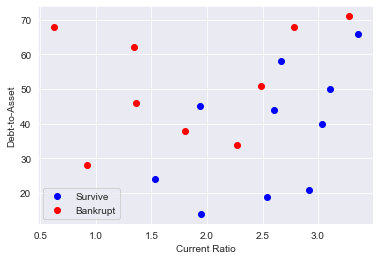

In [184]:
tbl1=pd.read_excel('PS1 data.xlsx',sheet_name='table1')

# cm=mpl.colors.ListedColormap(['g','r'])
plt.scatter(x='Current Ratio',y='Debt-to-Asset',data=tbl1[tbl1['Bankruptcy']==0],c='b')
plt.scatter(x='Current Ratio',y='Debt-to-Asset',data=tbl1[tbl1['Bankruptcy']==1],c='r')
plt.legend(['Survive','Bankrupt'])
plt.xlabel('Current Ratio')
plt.ylabel('Debt-to-Asset')
plt.show()

(b) Assuming equal priors, compute the Z-scores and fill in the corresponding missing values in Table 1.

In [185]:
q0,q1=0.5,0.5
x0=np.array(tbl1.loc[tbl1['Bankruptcy']==0,['Current Ratio','Debt-to-Asset']])
x1=np.array(tbl1.loc[tbl1['Bankruptcy']==1,['Current Ratio','Debt-to-Asset']])
mu0_est=np.mean(x0,axis=0)
mu1_est=np.mean(x1,axis=0)
#sig_est=np.std(tbl1[['Current Ratio','Debt-to-Asset']],axis=0)

In [186]:
sig_est=(np.cov(x0.T)*(len(x0)-1)+np.cov(x1.T)*(len(x1)-1))/(len(tbl1)-2)

In [189]:
(mu0_est,mu1_est, (mu0_est+mu1_est)/2)

(array([ 2.566, 38.1  ]),
 array([ 1.87333333, 51.77777778]),
 array([ 2.21966667, 44.93888889]))

Current Ratio>=2.2197, Debt-to-Asset<=44.9389, non-default

In [191]:
decision_rule=(mu0_est+mu1_est)/2
for i in range(len(tbl1)):
    if tbl1.loc[i,'Current Ratio']>=decision_rule[0] and tbl1.loc[i,'Debt-to-Asset']<=decision_rule[1]:
        print(i,'non-def')
    elif tbl1.loc[i,'Current Ratio']<decision_rule[0] and tbl1.loc[i,'Debt-to-Asset']>decision_rule[1]:
        print(i,'def')
    else:
        print(i, 'not sure')

0 not sure
1 non-def
2 not sure
3 not sure
4 non-def
5 not sure
6 not sure
7 non-def
8 not sure
9 non-def
10 non-def
11 def
12 def
13 not sure
14 def
15 not sure
16 not sure
17 not sure
18 def


(c) Compute the zones of discrimination and fill in the predicted bankruptcy outcomes in Table 1. How many observations are misclassified? Discuss! [Note: 1 denotes bankruptcy, 0 denotes survival.]

In [194]:
mdl=LDA(priors=[0.5,0.5])
X=tbl1[['Current Ratio','Debt-to-Asset']]
y=tbl1['Bankruptcy']
mdl.fit(X,y)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

In [199]:
y_pred=mdl.predict(X)
lda_res=pd.DataFrame(np.vstack([np.array(y),y_pred]).T,columns=['Actual','Predict'])
lda_res

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,1,0
6,1,1
7,1,0
8,0,1
9,0,0


(d) (Optional) Implement the analysis using an alternative classification scheme based on machine learning algorithms. You can consider support vector machine (SVM), K-nearest neighbors (KNN), decision trees or random forest algorithms, among many others.

In [200]:
svc=svm.SVC().fit(X,y)
y_pred_svc=svc.predict(X)
lda_res['SVM predict']=y_pred_svc
lda_res.columns=['Actual','LDA predict','SVM predict']
lda_res

2. (Logistic Regression) Using the data from Table 1 in Question 1, answer the following questions:

(a) Estimate the probability of bankruptcy using the linear probability model. Compute the predicted probability and discuss the potential caveats of this linear model. You can consider drawing similar plots as in the lecture slide titled “Linear Probability Model vs. Logit Model – Example.”

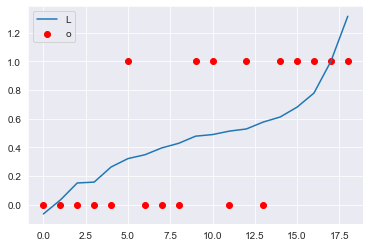

In [202]:
mdl=LinearRegression()

mdl.fit(X,y)
y_pred_cls=mdl.predict(X)
res=pd.DataFrame(np.hstack([y_pred_cls.reshape(len(y),1),np.array(y).reshape(len(y),1)]),columns=['Predict','Actual']).sort_values('Predict').reset_index(drop=True)

plt.plot(res['Predict'])
plt.scatter(res.index,res['Actual'],c='r')
plt.legend('Logit Model')
plt.show()

(b) Repeat the exercise in (a) using the logistic regression model.

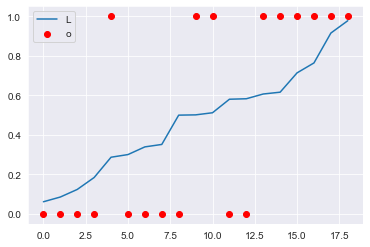

In [203]:
mdl=LogisticRegression()
X=tbl1[['Current Ratio','Debt-to-Asset']]
y=tbl1['Bankruptcy']
mdl.fit(X,y)
y_pred=mdl.predict_proba(X)
y_pred_cls=mdl.predict(X)
res=pd.DataFrame(np.hstack([y_pred,y_pred_cls.reshape(len(y),1),np.array(y).reshape(len(y),1)]),columns=['Survive','Bankrupt','Predict','Actual']).sort_values('Bankrupt').reset_index(drop=True)

plt.plot(res['Bankrupt'])
plt.scatter(res.index,res['Actual'],c='r')
plt.legend('Logit Model')
plt.show()

(c) Prepare a confusion matrix using the estimated outcome from the logistic model. What is the false positive rate, the false negative rate, the true positive rate (a.k.a. sensitivity), the true negative rate (a.k.a. specificity), respectively?

In [204]:
cm=confusion_matrix(res['Actual'],res['Predict'])
cm

array([[8, 2],
       [1, 8]])

In [205]:
tn, fp, fn, tp=cm.ravel()
(tn, fp, fn, tp)

(8, 2, 1, 8)

In [206]:
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
tpr=tp/(tp+fn)  # sensitivity
tnr=tn/(tn+fp)  # specificity
(fpr,fnr,tpr,tnr)

(0.2, 0.1111111111111111, 0.8888888888888888, 0.8)

(d) Construct the ROC curve of your logistic regression and discuss the model performance based
on the AUC.

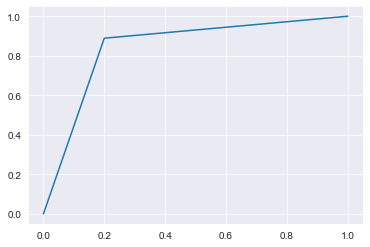

In [207]:
fpr1,tpr1,thresholds=roc_curve(res['Actual'],res['Predict'],)
plt.plot(fpr1,tpr1)

(e) Compare the in-sample performance of the prediction accuracy between the logistic regression
model and LDA in Question 1.

3. (CVaR using CreditMetrics) Consider the information in Tables 2 and 3 for answering the following questions. Table 2 summarizes 1-year transition probabilities. Table 3 provides 1-year forward rates for year by year cash flows by ratings. Using these rates, one can construct forward discount factors for the cash flow terms of interest by ratings:

(a) Consider a 5-year senior unsecured bond issued by an A-rated obligor today. The bond has a face value of $100 million and an annual coupon rate of 5%. Over 1 year, the obligor’s rating could migrate to new ratings. The average recovery rate upon default for the senior unsecured claim is 51.13%. What is the bond’s expected value (and its standard deviation) in 1 year? Also determine the 1-year 99.7% CVaR of this single debt position.

In [208]:
tbl2=pd.read_excel('PS1 data.xlsx',sheet_name='table2',index_col=0)
tbl3=pd.read_excel('PS1 data.xlsx',sheet_name='table3',index_col=0)
idx=tbl2.columns.tolist()
mat1=np.vstack([np.array(tbl2),np.array([0]*tbl2.shape[1])])

#mat1@mat1@mat1@mat1@mat1

In [209]:
trans_1y=pd.DataFrame(mat1@mat1,index=idx,columns=idx)

trans_prob_A=trans_1y.loc['A',:]
c=0.05
maturity=5
recovery_rate=0.5113
face_val=100
#disc_rate=np.array(tbl3.loc[:,1])
disc_rate=np.array(tbl3.fillna(0))
exp_val=np.sum(c*face_val*np.exp(-np.arange(0,maturity)*disc_rate),axis=1)+face_val*np.exp(-(maturity-1)*disc_rate[:,-1])

In [210]:
df=pd.DataFrame(np.vstack([np.array(list(exp_val)+[face_val*recovery_rate]),trans_prob_A]).T,index=idx,columns=['value','prob'])
li=df['prob'].tolist()
li.reverse()
li=list(np.cumsum(li))
li.reverse()
df['cum_prob']=li
df

,value,prob,cum_prob
AAA,104.394553,0.001809,0.999400
AA,103.054374,0.041516,0.997591
A,101.594340,0.834125,0.956074
BBB,97.773670,0.098975,0.121949
BB,94.177906,0.015808,0.022974
B,84.336821,0.005880,0.007166
CCC,67.134928,0.000407,0.001286
Default,51.130000,0.000879,0.000879


In [211]:
exp_val=(df['value']*df['prob']).sum()
exp_val

100.94379797994145

In [212]:
CVaR997=exp_val-df.loc['B','value']
CVaR997

16.606976559744083

(b) Now consider a portfolio of two bonds. The first bond is the bond introduced in (a) above. The second bond is the 3-year senior unsecured bond issued by a BB-rated obligor. The obligors’ assets are correlated with a correlation parameter of 30%. What is the bond portfolio’s expected value (and its standard deviation) in 1 year? Also determine its 1-year 99.7% CVaR.

In [170]:
trans_prob_BB = trans_1y.loc['BB',:]
li1=trans_prob_BB.tolist()
li1.reverse()
li1=list(np.cumsum(li1))
li1.reverse()
dist_A=[stats.norm.ppf(p) for p in li]
dist_BB=[stats.norm.ppf(p) for p in li1]
df_A_BB=pd.DataFrame([trans_prob_A.tolist(),li,dist_A,trans_prob_BB.tolist(),li1,dist_BB],columns=idx,index=['prob_A','cum_prob_A','threshold_A','prob_BB','cum_prob_BB','threshold_BB']).T
df_A_BB

,prob_A,cum_prob_A,threshold_A,prob_BB,cum_prob_BB,threshold_BB
AAA,0.001809,0.999400,3.238761,0.000567,0.989392,2.304124
AA,0.041516,0.997591,2.818908,0.002926,0.988825,2.284361
A,0.834125,0.956074,1.706843,0.016440,0.985899,2.194463
BBB,0.098975,0.121949,-1.165298,0.130336,0.969458,1.872893
BB,0.015808,0.022974,-1.995871,0.658622,0.839123,0.990859
B,0.005880,0.007166,-2.448839,0.147015,0.180501,-0.913459
CCC,0.000407,0.001286,-3.014834,0.018231,0.033486,-1.831866
Default,0.000879,0.000879,-3.128304,0.015255,0.015255,-2.163402


In [178]:
li_all=[]
for r in idx:
    trans_prob = trans_1y.loc[r,:]
    li=trans_prob.tolist()
    li.reverse()
    li=list(np.cumsum(li))
    li.reverse()
    dist=[stats.norm.ppf(p) for p in li]
    li_all.append(dist)


def calc_trans_prob(Ra_low,Ra_up,Rb_low,Rb_up,rho=0.3):
    res=dblquad(lambda Ra,Rb: 1/(2*np.pi*np.sqrt(1-rho**2))*np.exp(-1/(2*(1-rho**2))*(Ra**2+Rb**2-2*rho*Ra*Rb)),
        Ra_low,Ra_up,
        lambda Rb:Rb_low,
        lambda Rb:Rb_up,
        )
    return res[0]

In [213]:
threshold_df=pd.DataFrame(li_all,index=idx,columns=idx)
threshold_df

,AAA,AA,A,BBB,BB,B,CCC,Default
AAA,inf,-0.935503,-1.987193,-2.608184,-2.809164,-3.435858,-3.900788,-4.133295
AA,5.165342,2.233004,-0.981762,-2.030991,-2.548874,-2.710712,-3.255246,-3.572196
A,3.238761,2.818908,1.706843,-1.165298,-1.995871,-2.448839,-3.014834,-3.128304
BBB,2.911056,2.840560,2.342940,1.194667,-1.171293,-1.869777,-2.521523,-2.746895
BB,2.304124,2.284361,2.194463,1.872893,0.990859,-0.913459,-1.831866,-2.163402
B,1.624080,1.622959,1.603849,1.559600,1.457918,0.915700,-1.209843,-1.624357
CCC,0.849698,0.837404,0.835863,0.819454,0.743987,0.609682,0.150944,-1.105462
Default,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [222]:
calc_trans_prob(-999,-3.572196,-999,-2.163402)

2.5437964673930327e-05

In [227]:
prob_li=[]

for a in range(len(idx)):
    for b in range(len(idx)):
        if idx[a]=='Default':
            Ra_low=-99999
        else:
            Ra_low=threshold_df.loc['A',idx[a+1]]
        Ra_up=threshold_df.loc['A',idx[a]]

        if idx[b]=='Default':
            Rb_low=-99999
        else:
            Rb_low=threshold_df.loc['BB',idx[b+1]]
        Rb_up=threshold_df.loc['BB',idx[b]]

        p=calc_trans_prob(Ra_low,Ra_up,Rb_low,Rb_up)
        prob_li.append([idx[a],idx[b],p])

df=pd.DataFrame(prob_li)
df.pivot(index=0,columns=1,values=2).reindex(idx).T.reindex(idx).T

1,AAA,AA,A,BBB,BB,B,CCC,Default
0,,,,,,,,
AAA,5.108906e-06,2.524729e-05,1.197018e-04,0.000556,0.000924,0.000049,0.000003,0.0
AA,7.378117e-05,3.706483e-04,1.873244e-03,0.010518,0.024778,0.002061,0.000142,0.0
A,4.715385e-04,2.440338e-03,1.387710e-02,0.112474,0.558696,0.114430,0.013078,0.0
BBB,1.336405e-05,7.171208e-05,4.700676e-04,0.005798,0.061413,0.023688,0.003715,0.0
BB,1.103466e-06,6.001599e-06,4.151952e-05,0.000605,0.008918,0.004499,0.000819,0.0
B,2.562454e-07,1.406014e-06,1.007832e-05,0.000164,0.003042,0.001838,0.000371,0.0
CCC,1.149681e-08,6.359179e-08,4.708283e-07,0.000008,0.000193,0.000135,0.000030,0.0
Default,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0


(c) (Optional) For a general portfolio of N≫ 2 bonds, one has to simulate correlated standard normal variables, and then use the ratings’ cutoffs to determine the new rating that is expected for each obligor in 1 year. To become familiar with this simulation approach, consider the same case as in (b), i.e., N=2, and illustrate how you can generate two correlated standard normal variables using the Cholesky decomposition of the covariance matrix,$
V =
\left[\begin{array}{c}
1 & 0.30 \\
0.30 & 1
\end{array}\right]
$. Simulate a sample of 10,000 draws and determine the 1-year 99.7% CVaR using the simulated portfolio values. [Note: A Cholesky decomposition yields a lower triangular matrix, L, such that LTL = V .]